In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
hard_elec = pd.read_csv("hard_elec_reduced_new_no_EC.csv")

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_selection import mutual_info_regression

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [7]:
#hard = pd.read_csv("hardness_composition_data.csv")
hard_elec_ip = hard_elec.drop(columns = ["Hardness"])
hard_elec_op =hard_elec["Hardness"]

In [8]:
hard_elec.head()

,del r,delta x,VEC,delta H,delta S,omega,upper lamda,e1/a,Hardness
0,0.049517,0.121763,7.735,-4.504864,14.703548,5283.665760,5996.595516,1.820,473.0
1,0.050757,0.116571,8.008,-5.034848,14.703548,4618.000434,5707.252374,1.911,367.0
2,0.050006,0.124052,7.826,-5.564832,14.703548,4266.914201,5879.963503,1.820,418.0
3,0.049517,0.119375,7.644,-3.908632,14.703548,6103.238979,5996.595516,1.820,423.0
4,0.032019,0.103069,8.058,-6.400612,12.594051,3567.981959,12284.658130,1.844,168.0


In [9]:
hard_elec_ip.head()

,del r,delta x,VEC,delta H,delta S,omega,upper lamda,e1/a
0,0.049517,0.121763,7.735,-4.504864,14.703548,5283.665760,5996.595516,1.820
1,0.050757,0.116571,8.008,-5.034848,14.703548,4618.000434,5707.252374,1.911
2,0.050006,0.124052,7.826,-5.564832,14.703548,4266.914201,5879.963503,1.820
3,0.049517,0.119375,7.644,-3.908632,14.703548,6103.238979,5996.595516,1.820
4,0.032019,0.103069,8.058,-6.400612,12.594051,3567.981959,12284.658130,1.844


<Axes: >

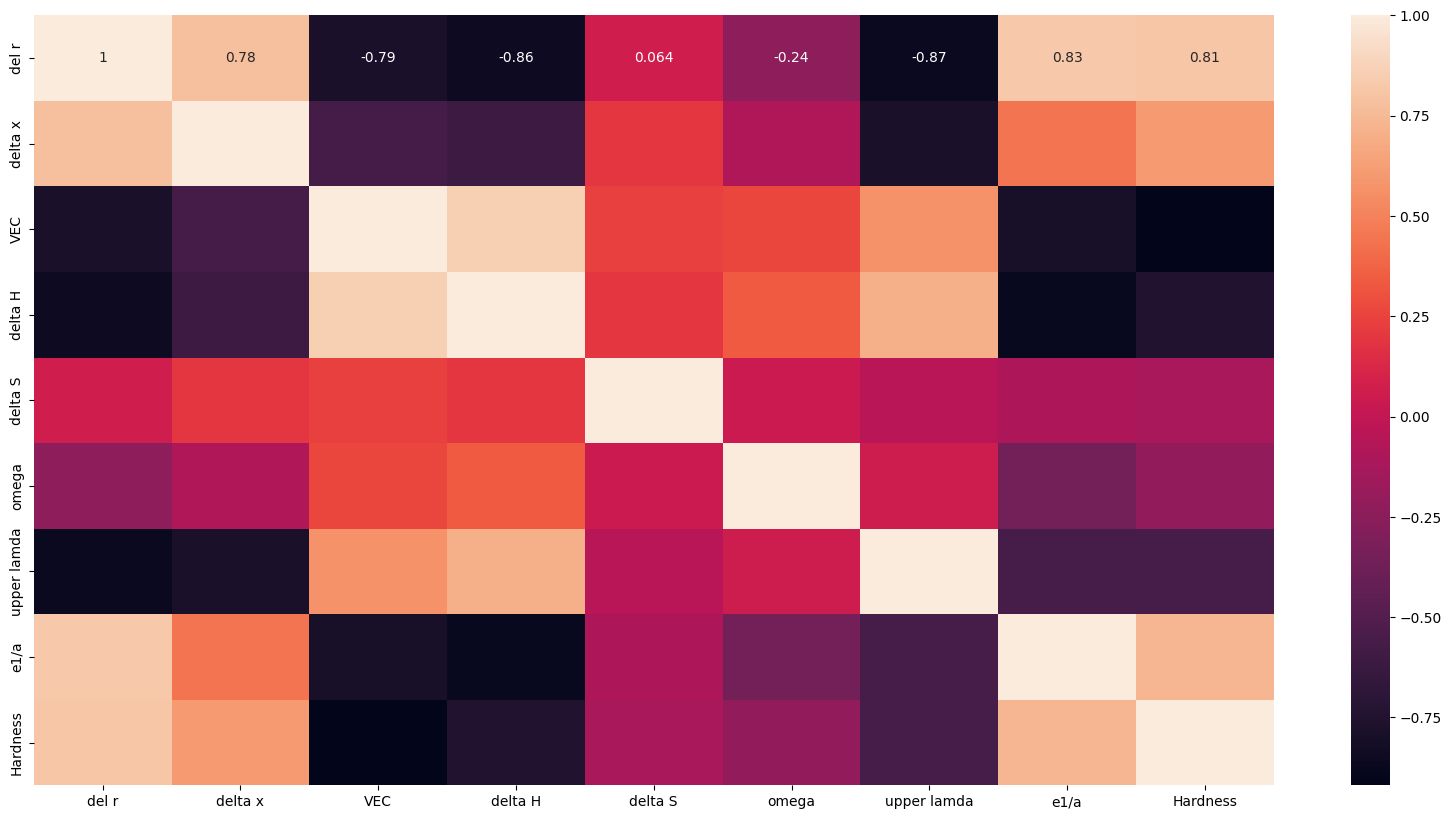

In [10]:
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap( hard_elec.corr(), annot = True)

In [11]:
X = hard_elec_ip
y = hard_elec_op

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
   y,
    test_size=0.,
    random_state=0)

X_train.shape, X_test.shape

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
   y,
    test_size=0.1,
    random_state=0)

X_train.shape, X_test.shape

((184, 8), (21, 8))

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

0

In [15]:
corr_features

set()

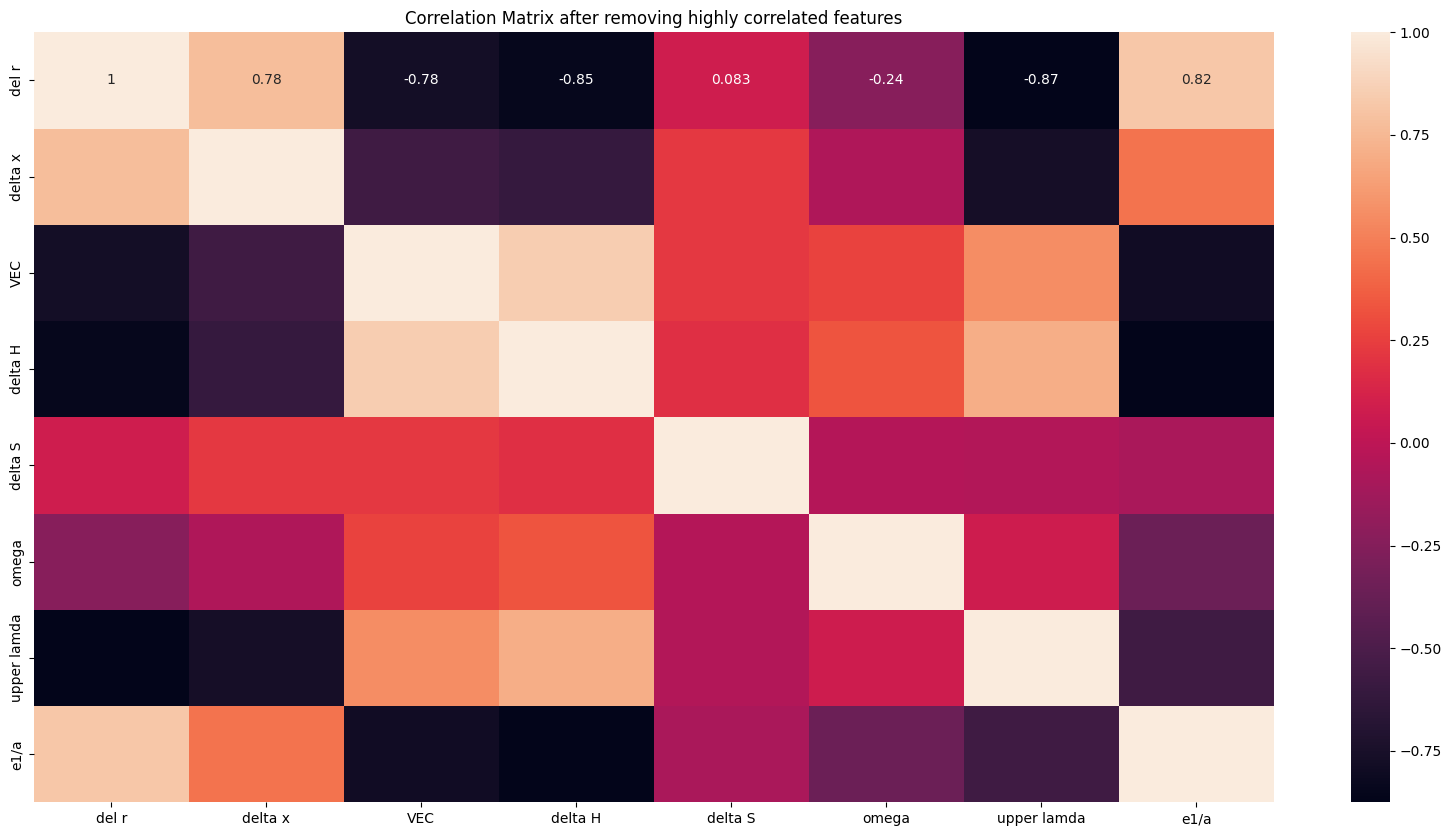

In [16]:




# Remove the highly correlated features from the dataset
X_train_reduced = X_train.drop(columns=corr_features)

# Create a new heatmap for the reduced dataset
plt.figure(figsize=(20, 10))
sns.heatmap(X_train_reduced.corr(), annot=True)
plt.title('Correlation Matrix after removing highly correlated features')
plt.show()


In [17]:
# Assuming you have already dropped correlated features from X_train and X_test

# Drop correlated features from X_train
X_train = X_train.drop(corr_features, axis=1)

# Drop correlated features from X_test
X_test = X_test.drop(corr_features, axis=1)

# Print the features of X_train
print("Features of X_train after dropping correlated features:")
print(X_train.columns)

# Print the features of X_test
print("\nFeatures of X_test after dropping correlated features:")
print(X_test.columns)


Features of X_train after dropping correlated features:
Index(['del r', 'delta x', 'VEC', 'delta H', 'delta S', 'omega', 'upper lamda',
       'e1/a'],
      dtype='object')

Features of X_test after dropping correlated features:
Index(['del r', 'delta x', 'VEC', 'delta H', 'delta S', 'omega', 'upper lamda',
       'e1/a'],
      dtype='object')


In [18]:
print(X_train.columns)

Index(['del r', 'delta x', 'VEC', 'delta H', 'delta S', 'omega', 'upper lamda',
       'e1/a'],
      dtype='object')


In [19]:
 #Print the features of X
print("\nFeatures of X_test after dropping correlated features:")
print(X.columns)



Features of X_test after dropping correlated features:
Index(['del r', 'delta x', 'VEC', 'delta H', 'delta S', 'omega', 'upper lamda',
       'e1/a'],
      dtype='object')


In [20]:
def get_param_grid_for_model(model_name):
    param_grids = {
        'lr': {
            'model__regressor__fit_intercept': [True, False],

        },
        'ridge': {
            'model__regressor__alpha': [0.1, 1.0, 10.0],
            'model__regressor__fit_intercept': [True, False],
            'model__regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        },
        'lasso': {
            'model__regressor__alpha': [0.1, 1.0, 10.0],
            'model__regressor__fit_intercept': [True, False],
            'model__regressor__positive': [True, False],
            'model__regressor__selection': ['cyclic', 'random']
        },
        'rf': {
            'model__regressor__n_estimators': [50, 100, 200],
            'model__regressor__max_depth': [None, 10, 20],
            'model__regressor__min_samples_split': [2, 5, 10],
            'model__regressor__min_samples_leaf': [1, 2, 4]
        },
        'gb': {
            'model__regressor__n_estimators': [50, 100, 200],
            'model__regressor__learning_rate': [0.01, 0.1, 0.2],
            'model__regressor__max_depth': [3, 5, 7],
            'model__regressor__min_samples_split': [2, 5, 10],
            'model__regressor__min_samples_leaf': [1, 2, 4]
        },
        'svr': {
            'model__regressor__C': [0.1, 1.0, 10.0],
            'model__regressor__kernel': ['linear', 'poly', 'rbf'],
            'model__regressor__gamma': ['scale', 'auto']
        },
        'knn': {
            'model__regressor__n_neighbors': [3, 5, 10],
            'model__regressor__weights': ['uniform', 'distance'],
            'model__regressor__algorithm': ['auto', 'ball_tree', 'kd_tree']
        },
        'dt': {
            'model__regressor__max_depth': [None, 5, 10, 20],
            'model__regressor__min_samples_split': [2, 5, 10],
            'model__regressor__min_samples_leaf': [1, 2, 4]
        },
        'xgb': {
            'model__regressor__n_estimators': [10, 20, 50, 100],
            'model__regressor__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
            'model__regressor__max_depth': [3, 5],
            'model__regressor__gamma': [0, 0.1, 0.2],
            'model__regressor__reg_alpha': [0, 0.1, 0.5],
            'model__regressor__reg_lambda': [0, 1.0, 10.0],

        },
        'lgbm': {
            'model__regressor__n_estimators': [50, 100, 200],
            'model__regressor__learning_rate': [0.01, 0.1, 0.2],
            'model__regressor__max_depth': [3, 5, 7],
            'model__regressor__num_leaves': [31, 63, 127],
            'model__regressor__min_child_samples': [20, 40, 60],
            'model__regressor__subsample': [0.6, 0.8, 1.0],
            'model__regressor__colsample_bytree': [0.6, 0.8, 1.0]
        },
        'catboost': {
            'model__regressor__iterations': [100, 200, 500],
            'model__regressor__learning_rate': [0.01, 0.1, 0.2],
            'model__regressor__depth': [3, 5, 7]
        }
    }
    return param_grids.get(model_name, {})

In [21]:
import lightgbm as lgb
from catboost import CatBoostRegressor

In [22]:
# Define the models
models = {
    'lr': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'rf': RandomForestRegressor(),
    
    'svr': SVR(),
    
    'dt': DecisionTreeRegressor(),
 
    'lgbm' : lgb.LGBMRegressor(verbose = -1)
    
}

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Train individual models and perform GridSearchCV
best_models = {}

for name, model in models.items():

    pipeline = Pipeline([
        ('preprocessor', MinMaxScaler()),
        ('model', TransformedTargetRegressor(regressor = model,
                                        func= np.log,
                                        inverse_func = np.exp))
    ])
    param_grid = get_param_grid_for_model(name)  # Define your hyperparameter grid for each model
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = (grid_search.best_estimator_, grid_search.best_score_)
    import pickle

# save
    with open(f'{name}.pkl','wb') as f:
        pickle.dump(grid_search.best_estimator_,f)


In [23]:
top_3_models = sorted(best_models.items(), key = lambda x : x[-1][-1], reverse = True)[:3]
estimators = [(name, model) for name, (model, perf) in top_3_models]

In [24]:
top_3_models

[('rf',
  (Pipeline(steps=[('preprocessor', MinMaxScaler()),
                   ('model',
                    TransformedTargetRegressor(func=<ufunc 'log'>,
                                               inverse_func=<ufunc 'exp'>,
                                               regressor=RandomForestRegressor(max_depth=20,
                                                                               n_estimators=50)))]),
   -4400.587057347413)),
 ('lgbm',
  (Pipeline(steps=[('preprocessor', MinMaxScaler()),
                   ('model',
                    TransformedTargetRegressor(func=<ufunc 'log'>,
                                               inverse_func=<ufunc 'exp'>,
                                               regressor=LGBMRegressor(colsample_bytree=0.8,
                                                                       max_depth=5,
                                                                       subsample=0.6,
                                                    

In [25]:
# Build stacked regressor using top 3 models
np.random.seed(42)

final_estimator = RandomForestRegressor()

final_estimator_param_grid = {

            'model__regressor__final_estimator__n_estimators': [50, 100, 200],
            # 'model__regressor__final_estimator__max_depth': [None, 10, 20],
            # 'model__regressor__final_estimator__min_samples_split': [2, 5, 10],
            # 'model__regressor__final_estimator__min_samples_leaf': [1, 2, 4]
        }

stacked_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough = True
)


stacked_model_1 = pipeline = Pipeline([
        ('preprocessor', MinMaxScaler()),
        ('model', TransformedTargetRegressor(regressor = stacked_regressor,
                                        func= np.log,
                                        inverse_func = np.exp))
    ])

grid_search = GridSearchCV(estimator=stacked_model_1, param_grid=final_estimator_param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
import pickle
# save
# Save the model using pickle
with open('model_top8_7thjul.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

In [26]:
# Use best estimator from GridSearchCV
stacked_model_1 = grid_search.best_estimator_

#predixtion

In [27]:
 y_pred = stacked_model_1.predict(X_test)

In [28]:
mean_absolute_percentage_error(y_test, y_pred)

0.07560564092893514

In [29]:
r2_score(y_test, y_pred)

0.9629838121554892

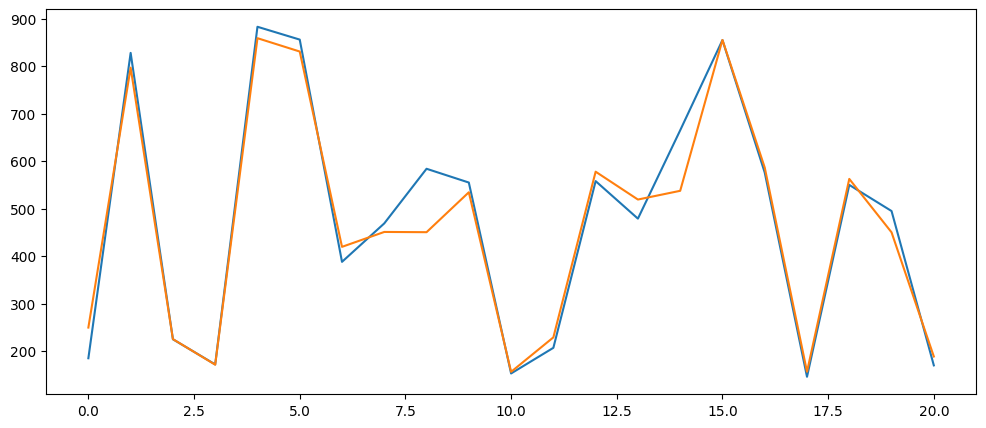

In [30]:
plt.figure(figsize = (12,5))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_pred)), y_pred);

In [31]:
# Individual Model

In [32]:

# Drop correlated features from X_train
X_new = X.drop(corr_features, axis=1)

# Drop correlated features from X_test
#X_test = X_test.drop(corr_features, axis=1)

In [33]:
model_performance_df = pd.DataFrame(columns = ["Model Name", "Train R2 Score", "Test R2 Score" ,"Overall R2", "Train MAPE" , "Test MAPE" ,  "Overall MAPE"])

              
model_namer = {"lr" : "Linear",
               "ridge" : "Ridge",
               "lasso" : "Lasso",
               "rf" : "Random Forest",
              
               "svr" : "SVR",
               
               "dt" : "Decision Tree",
              
               "lgbm" : "LGBM"}
for model_name, (model, _) in best_models.items():
    y_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    total_pred = model.predict(X_new)
    error = total_pred - y

    model_performance_df  = pd.concat([model_performance_df, pd.DataFrame([{"Model Name" : model_namer.get(model_name),
                                                       "Train R2 Score" : r2_score(y_train, train_pred),
                                                       "Test R2 Score" : r2_score(y_test, y_pred),
                                                       "Overall R2" : r2_score(y, total_pred),
                                                       "Train MAPE" : mean_absolute_percentage_error(y_train, train_pred),
                                                       "Test MAPE" : mean_absolute_percentage_error(y_test, y_pred),
                                                       "Overall MAPE" : mean_absolute_percentage_error(y, total_pred),
                                                       "Error Variance" : error.var()
                                                      }])], ignore_index=True)
    
y_pred = stacked_model_1.predict(X_test)
train_pred = stacked_model_1.predict(X_train)
total_pred = stacked_model_1.predict(X_new)
error = total_pred - y
model_performance_df  = pd.concat([model_performance_df, pd.DataFrame([{"Model Name" : "Stacked",
                                                    "Train R2 Score" : r2_score(y_train, train_pred),
                                                    "Test R2 Score" : r2_score(y_test, y_pred),
                                                    "Overall R2" : r2_score(y, total_pred),
                                                    "Train MAPE" : mean_absolute_percentage_error(y_train, train_pred),
                                                    "Test MAPE" : mean_absolute_percentage_error(y_test, y_pred),
                                                    "Overall MAPE" : mean_absolute_percentage_error(y, total_pred),
                                                    "Error Variance" : error.var()
                                                    }])], ignore_index=True)


C:\Users\DEBS\AppData\Local\Temp\ipykernel_38320\2905610540.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df  = pd.concat([model_performance_df, pd.DataFrame([{"Model Name" : model_namer.get(model_name),


In [34]:
model_performance_df

,Model Name,Train R2 Score,Test R2 Score,Overall R2,Train MAPE,Test MAPE,Overall MAPE,Error Variance
0,Linear,0.890860,0.932580,0.895825,0.136610,0.117279,0.134630,5565.913516
1,Ridge,0.897292,0.922745,0.900350,0.139937,0.132111,0.139135,5289.100961
2,Lasso,0.235625,0.289524,0.242548,0.456990,0.509654,0.462385,36986.104724
3,Random Forest,0.988167,0.952138,0.983967,0.044292,0.074469,0.047383,852.932756
4,SVR,0.915992,0.929424,0.917631,0.126130,0.117343,0.125230,4299.566639
5,Decision Tree,0.988051,0.930968,0.981391,0.037384,0.078274,0.041573,999.218041
6,LGBM,0.978782,0.933735,0.973536,0.055952,0.082030,0.058623,1407.385111
7,Stacked,0.987484,0.962984,0.984631,0.042360,0.075606,0.045765,813.492923


In [35]:
# Use best estimator from GridSearchCV
#stacked_model_1 = grid_search.best_estimator_

# Explain model predictions using SHAP
#explainer = shap.Explainer(stacked_model_1.named_steps['model'].regressor_)
#shap_values = explainer.shap_values(X_test)

# Plot SHAP waterfall plots
#shap.plots.waterfall(shap_values[0])
#shap.plots.waterfall(shap_values[1], max_display=4)
